In [59]:
import pandas as pd 
import numpy as np
dataset = pd.read_excel("../Data/Womens Clothing Reviews Data New.xlsx")
dataset

,Product_ID,Category,SubCategory1,SubCategory2,Location,Channel,Customer_Age,Rating,Recommend_Flag,Merged_Review
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,4,1,Absolutely wonderful - silky and sexy and com...
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,5,1,Love this dress! it's sooo pretty. i happen...
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,3,0,Some major design flaws I had such high hopes ...
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,5,1,"My favorite buy! I love, love, love this jumps..."
4,847,General,Tops,Blouses,Bangalore,Web,47,5,1,Flattering shirt This shirt is very flattering...
...,...,...,...,...,...,...,...,...,...,...
22637,1104,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,5,1,Great dress for many occasions I was very happ...
22638,862,General Petite,Tops,Knits,Gurgaon,Web,48,3,1,Wish it was made of cotton It reminds me of ma...
22639,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,3,0,"Cute, but see through This fit well, but the t..."
22640,1084,General,Dresses,Dresses,Gurgaon,Web,28,3,1,"Very cute dress, perfect for summer parties an..."


In [60]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download necessary resources for SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\leaps\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [61]:
dataset.columns

Index(['Product_ID', 'Category', 'SubCategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer_Age', 'Rating', 'Recommend_Flag', 'Merged_Review'],
      dtype='object')

In [62]:
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

# Assuming you have loaded your dataset into the variable 'dataset'

# Initialize the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment scores using SentimentIntensityAnalyzer
def get_sentiment_score(row):
    sentiment_score = analyzer.polarity_scores(row['Merged_Review'])
    return sentiment_score['compound']

# Apply the sentiment analysis function to each row of the DataFrame
dataset['sentiment_score'] = dataset.apply(get_sentiment_score, axis=1)

# Function to get sentiment category based on the compound score
def get_sentiment_category(compound_score):
    if compound_score > 0.1:
        return 'Positive'
    elif compound_score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment analysis function to each row of the DataFrame
dataset['sentiment_category'] = dataset['sentiment_score'].apply(get_sentiment_category)

# Display the DataFrame with the added 'sentiment_category' column
print(dataset[['Merged_Review', 'sentiment_category']])

                                           Merged_Review sentiment_category
0       Absolutely wonderful - silky and sexy and com...           Positive
1       Love this dress!  it's sooo pretty.  i happen...           Positive
2      Some major design flaws I had such high hopes ...           Positive
3      My favorite buy! I love, love, love this jumps...           Positive
4      Flattering shirt This shirt is very flattering...           Positive
...                                                  ...                ...
22637  Great dress for many occasions I was very happ...           Positive
22638  Wish it was made of cotton It reminds me of ma...           Positive
22639  Cute, but see through This fit well, but the t...           Positive
22640  Very cute dress, perfect for summer parties an...           Positive
22641  Please make more like this one! This dress in ...           Positive

[22642 rows x 2 columns]


In [63]:
dataset.head()

,Product_ID,Category,SubCategory1,SubCategory2,Location,Channel,Customer_Age,Rating,Recommend_Flag,Merged_Review,sentiment_score,sentiment_category
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,4,1,Absolutely wonderful - silky and sexy and com...,0.8932,Positive
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,5,1,Love this dress! it's sooo pretty. i happen...,0.9729,Positive
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,3,0,Some major design flaws I had such high hopes ...,0.9427,Positive
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,5,1,"My favorite buy! I love, love, love this jumps...",0.7182,Positive
4,847,General,Tops,Blouses,Bangalore,Web,47,5,1,Flattering shirt This shirt is very flattering...,0.9436,Positive


In [64]:
# Calculate the total positive, negative, and neutral sentiments using value_counts()
sentiment_counts = dataset['sentiment_category'].value_counts()

# Display the total positive, negative, and neutral sentiments
print(sentiment_counts)

sentiment_category
Positive    21089
Negative     1208
Neutral       345
Name: count, dtype: int64


In [68]:
dataset.columns

Index(['Product_ID', 'Category', 'SubCategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer_Age', 'Rating', 'Recommend_Flag', 'Merged_Review',
       'sentiment_score', 'sentiment_category'],
      dtype='object')

In [74]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
import plotly.express as px
# Calculate the total positive, negative, and neutral sentiments using value_counts()
sentiment_counts = dataset['sentiment_category'].value_counts().reset_index()

# Create a bar plot using Plotly Express to visualize the distribution of sentiments
fig_bar = px.bar(sentiment_counts, x='index', y='sentiment_category', color='index',
                 labels={'index': 'Sentiment', 'sentiment_category': 'Count'},
                 title='Sentiment Distribution in the Dataset')

# Create a pie chart using Plotly Express to visualize the distribution of sentiments
fig_pie = px.pie(sentiment_counts, values='sentiment_category', names='index',
                 title='Sentiment Distribution in the Dataset')

# Display both the bar plot and pie chart side by side
fig_bar.show()
fig_pie.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['sentiment_category', 'count'] but received: index
 To use the index, pass it in directly as `df.index`.

In [ ]:
dataset.Rating.value_counts()

Rating
5    12541
4     4908
3     2823
2     1549
1      821
Name: count, dtype: int64

In [ ]:
pd.crosstab(dataset.sentiment_category, dataset.Rating)

Rating,1,2,3,4,5
sentiment_category,,,,,
Negative,286,330,348,147,97
Neutral,58,87,112,53,35
Positive,477,1132,2363,4708,12409


In [ ]:
""" Divide the data into three groups on the basis of sentiments like positive, negative and neutral """
dataset_neg = dataset[(dataset.sentiment_category=='Negative')]
dataset_pos = dataset[(dataset.sentiment_category=='Positive')]
dataset_neu = dataset[(dataset.sentiment_category=='Neutral')]

In [ ]:
dataset.columns

Index(['Product_ID', 'Category', 'SubCategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer_Age', 'Rating', 'Recommend_Flag', 'Merged_Review',
       'sentiment', 'sentiment_score', 'sentiment_category'],
      dtype='object')

In [ ]:
""" plit the data into train & Test where y variable is Rating """
from sklearn.model_selection import train_test_split
## X-variable is Merged_Review and y-variable is Rating
# define X and y
X = dataset.Merged_Review
y = dataset.Rating

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16981,)
(5661,)
(16981,)
(5661,)


In [ ]:
""" Split the data into train & Test for positive sentiments and negative sentiments """
# create a new DataFrame that only contains the 5 Rating and 1-Rating reviews
# define X and y
X2 = dataset_pos.Merged_Review
y2 = dataset_pos.Rating

# split the new DataFrame into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=1)
print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(15816,)
(5273,)
(15816,)
(5273,)


In [ ]:
# define X and y
X1 = dataset_neg.Merged_Review
y1 = dataset_neg.Rating

# split the new DataFrame into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=1)
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(906,)
(302,)
(906,)
(302,)


In [ ]:
dataset_pos.shape

(21089, 13)

In [ ]:
dataset_neg.shape

(1208, 13)

In [ ]:
""" Creating user defined functions for clean the text and pre-process the data """
import re
from nltk.tokenize import word_tokenize
def clean_text(Merged_Review):
    Merged_Review = Merged_Review.lower()
    Merged_Review = Merged_Review.strip()
    Merged_Review = re.sub(r' +', ' ', Merged_Review)
    Merged_Review = re.sub(r"[-()\"#/@;:{}`+=~|.!?*&£%€¦_><‘|,'0-9]", "", Merged_Review)
    Merged_Review = Merged_Review.replace('wat', 'what').replace('txts', 'texts').replace('vry', 'very').replace('gud', 'good').replace('nyt', 'night').replace('msg', 'message')
    return Merged_Review

In [ ]:
import nltk
nltk.download('stopwords')

sw = list(set(nltk.corpus.stopwords.words('english')))
print(sw)

['shan', 'such', 're', 'before', 'here', 'yours', 'you', 's', 'further', 'other', 'it', 'or', 'the', 'after', "couldn't", 'them', 'over', 'do', 'so', 'wouldn', "it's", 'during', 'again', 'weren', 'been', 'll', "shan't", 'if', 'me', 've', 'an', 'below', 'about', 'ourselves', 'will', 'being', 'into', 'most', 'shouldn', 'hers', 'more', 'from', 'off', "needn't", 'his', 'at', 'couldn', 'themselves', 'through', 'between', "hasn't", "didn't", 'mightn', "should've", 'down', 'when', 'own', 'itself', 'this', 'for', 'your', 'why', 'didn', 'those', 'haven', 'my', 'to', 'are', 'what', 'under', 'he', 'on', 'm', 'its', 'aren', 'wasn', 'ain', 'these', 'him', 'should', "isn't", "don't", 'our', 'above', 'as', 'by', 'ma', "weren't", 'who', 'that', 'against', 'she', 'both', 'y', "you'd", 'won', 'can', 'how', 'we', 'needn', 'having', 'whom', 'of', 'then', 'in', "wouldn't", 'hadn', 'very', 'himself', 'there', 'am', 'has', 'some', 'mustn', 'few', 'out', 'too', "hadn't", 'just', 'not', "shouldn't", 'with', "y

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leaps\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Create a set of English stopwords
stop = set(stopwords.words('english'))

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def pre_process(Merged_Review):
    Merged_Review = Merged_Review.str.replace('/', '')  # Replacing the / with none
    Merged_Review = Merged_Review.apply(lambda x: " ".join(word for word in word_tokenize(x) if word not in stop))  # Removing stop words
    Merged_Review = Merged_Review.apply(lambda x: " ".join(lemmatizer.lemmatize(word) for word in word_tokenize(x)))  # Lemmatization
    return Merged_Review

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\leaps\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\leaps\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leaps\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
X_train = X_train.apply(lambda x: clean_text(x))
X_test = X_test.apply(lambda x: clean_text(x))

In [ ]:
X_train=pre_process(X_train)
X_test=pre_process(X_test)

CLean the text and pre-process the data for positive sentiments


In [ ]:
X2_train = X2_train.apply(lambda x: clean_text(x))
X2_test = X2_test.apply(lambda x: clean_text(x))

In [ ]:
X2_train=pre_process(X2_train)
X2_test=pre_process(X2_test)

In [ ]:
X2_train

16673    gorgous design poor fit suit absolutely gorgeo...
6499     knockoff dress gorgeous flattering oood qualit...
8615     cozy soft shirt love shirt subdued color casua...
17057    classy tried store ended size almost could gon...
8238     dont try arent prepared buy love jacket great ...
                               ...                        
11754             love love shirt fit great cute must fall
18557    im thrilled fabric little heavier fit really w...
5567     cute run large top run large loose fitting mid...
13057    wanted love like feel stretch softness dress c...
253      pretty denim jacket perfect jacket shirt tee d...
Name: Merged_Review, Length: 15816, dtype: object

CLean the text and pre-process the data for negative sentiments

In [ ]:
X1_train = X1_train.apply(lambda x: clean_text(x))
X1_test = X1_test.apply(lambda x: clean_text(x))

In [ ]:
X1_train=pre_process(X1_train)
X1_test=pre_process(X1_test)

In [ ]:
X1_train

13594    doesnt look like photo arrived week disappoint...
13390    didnt work im shorter side spectrum usually we...
3903     product hole pocket area soft comfortable jack...
18013    returning thought dress would perfect th birth...
15187    returned immediately first product arrived sma...
                               ...                        
13868    odd fit dress odd fit loose top pointy dart ti...
17329    fabric comfortable pretty blouse polyester fab...
20594    underwhelmed stalked blouse price dropped poun...
4369     white background love top everything previous ...
19826    oh dear elastic waistband ruined skirt meit ma...
Name: Merged_Review, Length: 906, dtype: object

Vectorization (Count, Tfidf) for positive sentiments

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
#Train
count_vect2 = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' ,
                             max_features=800)
xtrain2_count = count_vect2.fit_transform(X2_train)

In [ ]:
xtrain2_count

<15816x800 sparse matrix of type '<class 'numpy.int64'>'
	with 363350 stored elements in Compressed Sparse Row format>

Vectorization (Count, Tfidf) for negative sentiments


In [ ]:
#Train
count_vect1 = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' ,
                             max_features=800)
xtrain1_count = count_vect1.fit_transform(X1_train)

In [ ]:
xtrain1_count

<906x800 sparse matrix of type '<class 'numpy.int64'>'
	with 19773 stored elements in Compressed Sparse Row format>

View the document term metrics for positive sentiments


In [ ]:
dtm=xtrain2_count.toarray()

In [ ]:
feature_names = count_vect2.get_feature_names_out()
feature_names

array(['able', 'absolutely', 'across', 'actually', 'add', 'added',
       'addition', 'adorable', 'adore', 'ag', 'ago', 'agree', 'airy',
       'aline', 'almost', 'along', 'already', 'also', 'although',
       'always', 'amazing', 'amount', 'anighthing', 'ankle', 'another',
       'anyone', 'anyway', 'appears', 'appropriate', 'area', 'arent',
       'arm', 'armhole', 'around', 'arrived', 'athletic', 'attractive',
       'available', 'average', 'away', 'awesome', 'awkward', 'b', 'baby',
       'back', 'bad', 'bag', 'baggy', 'band', 'barely', 'based', 'basic',
       'bc', 'beach', 'beading', 'beautiful', 'beautifully', 'beauty',
       'believe', 'belly', 'belt', 'best', 'better', 'big', 'bigger',
       'billowy', 'bit', 'black', 'blazer', 'blouse', 'blue', 'bodice',
       'body', 'boot', 'booty', 'bottom', 'bought', 'boxy', 'bra',
       'brand', 'breezy', 'bright', 'broad', 'brown', 'build', 'bulky',
       'bust', 'busty', 'butt', 'button', 'buy', 'buying', 'c', 'came',
       'cam

In [ ]:
dtm1=pd.DataFrame(dtm, columns = count_vect2.get_feature_names_out())
dtm1

,able,absolutely,across,actually,add,added,addition,adorable,adore,ag,...,xd,xl,xx,year,yellow,yes,yet,youre,zip,zipper
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15811,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15812,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15813,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15814,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dtm1.apply(sum)

able          296
absolutely    638
across        243
actually      475
add           442
             ... 
yes           172
yet           482
youre         282
zip           109
zipper        278
Length: 800, dtype: int64

View the document term metrics for negative sentiments


In [ ]:
dtm4=xtrain1_count.toarray()
print(count_vect1.get_feature_names_out())

['able' 'absolutely' 'across' 'actually' 'add' 'added' 'adorable' 'afraid'
 'ago' 'agree' 'ala' 'aline' 'almost' 'along' 'already' 'also' 'although'
 'always' 'amazing' 'amount' 'anighthing' 'ankle' 'another' 'anyone'
 'anyway' 'apart' 'appears' 'area' 'arent' 'arm' 'armhole' 'armpit'
 'around' 'arrived' 'assumed' 'attached' 'available' 'average' 'avoid'
 'away' 'awesome' 'awful' 'awkward' 'b' 'back' 'backside' 'bad' 'bag'
 'baggy' 'band' 'barely' 'based' 'basically' 'bead' 'beautiful' 'behind'
 'belt' 'best' 'better' 'beware' 'big' 'bigger' 'bit' 'black' 'blah'
 'blazer' 'blouse' 'blue' 'bodice' 'body' 'boob' 'boot' 'boring' 'bother'
 'bottom' 'bought' 'box' 'boxy' 'bra' 'brand' 'breast' 'bright' 'broad'
 'broke' 'brown' 'built' 'bulk' 'bulky' 'bummer' 'bust' 'busty' 'butt'
 'button' 'buy' 'buying' 'c' 'calf' 'came' 'cami' 'camisole' 'cant'
 'cardigan' 'care' 'case' 'casual' 'center' 'cheap' 'chest' 'chested'
 'cling' 'close' 'closely' 'clothes' 'clothing' 'coat' 'cold' 'collar'
 'col

In [ ]:
dtm5=pd.DataFrame(dtm4, columns = count_vect1.get_feature_names_out())
dtm5

,able,absolutely,across,actually,add,added,adorable,afraid,ago,agree,...,xx,year,yellow,yesterday,yet,youd,youre,zip,zipped,zipper
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
904,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
dtm5.apply(sum)

able          18
absolutely    20
across        14
actually      21
add            8
              ..
youd           5
youre         10
zip           22
zipped         8
zipper        34
Length: 800, dtype: int64

Word frequencies for positive sentiments


In [ ]:
word_freq = pd.DataFrame(dtm1.apply(sum).head(40), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)

In [ ]:
word_freq

,freq
also,1788
arm,1011
around,813
absolutely,638
adorable,580
another,543
almost,506
area,491
amazing,479
actually,475


In [ ]:
word_freq_dictionary = dict(dtm1.apply(sum))

<Axes: >

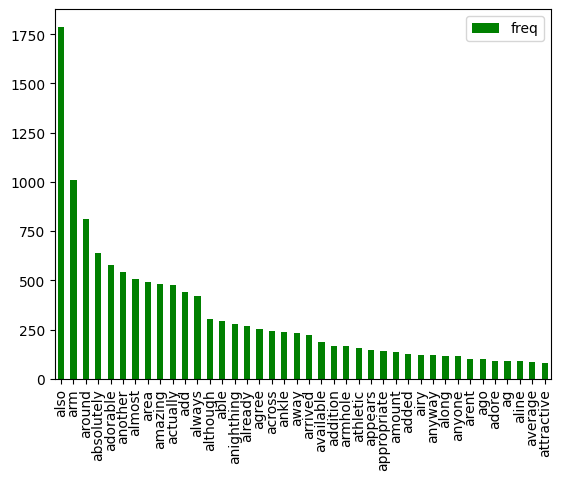

In [ ]:
word_freq.plot(kind='bar', color='Green')

Word frequencies for negative sentiments


In [ ]:
word_freq1 = pd.DataFrame(dtm5.apply(sum).head(40), columns=['freq'])
word_freq1.sort_values('freq', ascending=False, inplace=True)

In [ ]:
word_freq_dictionary1 = dict(dtm5.apply(sum))

In [ ]:
word_freq_dictionary1

{'able': 18,
 'absolutely': 20,
 'across': 14,
 'actually': 21,
 'add': 8,
 'added': 11,
 'adorable': 20,
 'afraid': 5,
 'ago': 6,
 'agree': 9,
 'ala': 6,
 'aline': 7,
 'almost': 33,
 'along': 11,
 'already': 11,
 'also': 146,
 'although': 14,
 'always': 23,
 'amazing': 9,
 'amount': 5,
 'anighthing': 17,
 'ankle': 12,
 'another': 41,
 'anyone': 12,
 'anyway': 6,
 'apart': 6,
 'appears': 17,
 'area': 53,
 'arent': 7,
 'arm': 79,
 'armhole': 19,
 'armpit': 12,
 'around': 58,
 'arrived': 29,
 'assumed': 5,
 'attached': 7,
 'available': 12,
 'average': 9,
 'avoid': 6,
 'away': 18,
 'awesome': 6,
 'awful': 38,
 'awkward': 40,
 'b': 18,
 'back': 207,
 'backside': 6,
 'bad': 70,
 'bag': 16,
 'baggy': 16,
 'band': 20,
 'barely': 11,
 'based': 9,
 'basically': 8,
 'bead': 7,
 'beautiful': 71,
 'behind': 7,
 'belt': 14,
 'best': 12,
 'better': 33,
 'beware': 8,
 'big': 108,
 'bigger': 11,
 'bit': 88,
 'black': 41,
 'blah': 7,
 'blazer': 5,
 'blouse': 54,
 'blue': 33,
 'bodice': 7,
 'body': 41,


For making word_clouds for postive sentiments


In [ ]:
from wordcloud import WordCloud ,STOPWORDS
wordcloud = WordCloud(background_color='white', stopwords=stop)



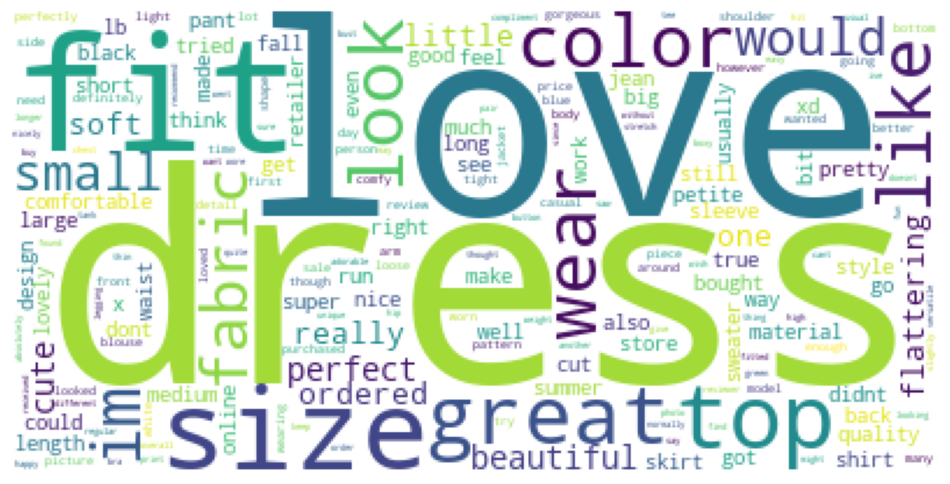

In [ ]:
wordcloud = wordcloud.generate_from_frequencies(word_freq_dictionary)

fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

For making word_clouds for negative sentiments


In [ ]:
from wordcloud import WordCloud ,STOPWORDS
wordcloud1 = WordCloud(background_color='white', stopwords=stop)

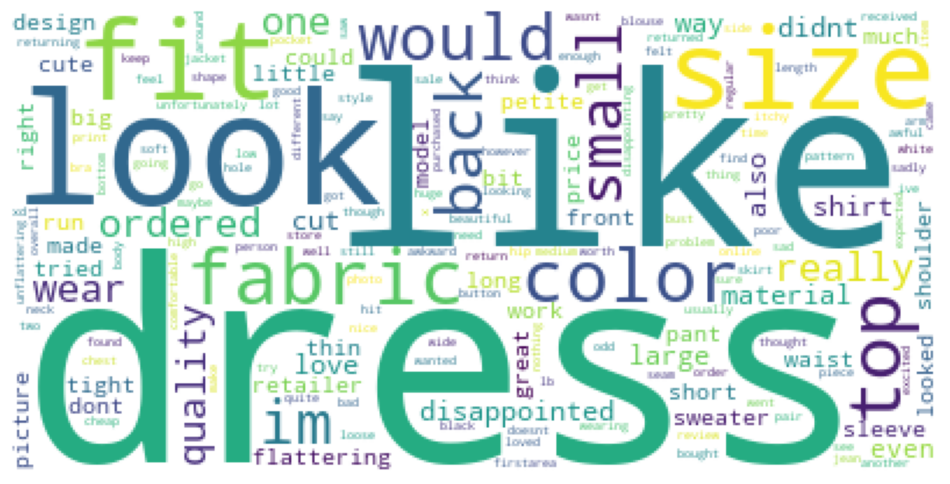

In [ ]:
wordcloud1 = wordcloud1.generate_from_frequencies(word_freq_dictionary1)

fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud1)
plt.show()